In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

# [Problem 1] Select features and categories for practice

In [2]:
iris = load_iris()

x = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width',\
                                          'petal_length', 'petal_width'])
y = pd.DataFrame(data=iris.target, columns=['species'])

frames = [x, y]
df = pd.concat(frames, axis=1)

data = df.loc[:, ['sepal_length', 'petal_length', 'species']]
data = data.loc[(data['species'] == 1) | (data['species'] == 2)]
data

,sepal_length,petal_length,species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


# [Problem 2] Data analysis

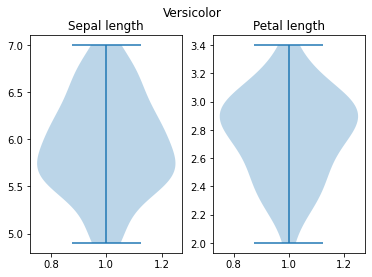

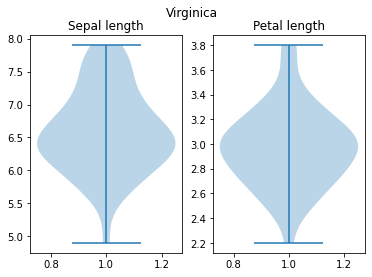

In [3]:
def plotViolin(data, title):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_title('Sepal length')
    ax1.violinplot(data.iloc[:, 0])

    ax2.set_title('Petal length')
    ax2.violinplot(data.iloc[:, 1])
    
    fig.suptitle(title)
    plt.show()

plotViolin(df.loc[df['species'] == 1], 'Versicolor')
plotViolin(df.loc[df['species'] == 2], 'Virginica')

# [Problem 3] Division of preprocessing/training data and verification data

In [4]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data.to_numpy())

# [Problem 4] Pretreatment/Standardization

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train[:, :-1])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
scaler.mean_

array([6.31066667, 4.916     ])

In [7]:
x_train = scaler.transform(train[:, :-1])
x_train

array([[ 1.86328493,  1.96397605],
       [-0.01541497,  0.09796555],
       [ 0.56264653, -0.25191142],
       [-0.88250724, -1.65141929],
       [ 0.85167729,  0.91434514],
       [-1.7495995 , -2.23454757],
       [ 2.00780031,  2.08060171],
       [-0.73799186,  0.21459121],
       [-0.4489611 ,  0.21459121],
       [ 2.00780031,  1.38084777],
       [-1.17153799, -1.06829101],
       [ 2.29683106,  1.73072474],
       [-1.02702261, -0.0186601 ],
       [ 0.27361578,  0.33121686],
       [-0.59347648,  0.21459121],
       [ 1.28522342,  1.0309708 ],
       [ 1.57425417,  1.38084777],
       [-0.88250724,  0.09796555],
       [-0.30444573, -0.36853707],
       [-0.73799186, -1.18491667],
       [ 0.1291004 , -0.48516273],
       [-0.01541497,  0.21459121],
       [-1.02702261, -1.18491667],
       [-0.88250724, -0.48516273],
       [-0.59347648, -0.8350397 ],
       [-1.17153799, -1.41816798],
       [ 0.56264653,  1.0309708 ],
       [ 1.28522342,  1.26422211],
       [-1.89411488,

In [8]:
x_test = scaler.transform(test[:, :-1])
x_test

array([[-0.01541497,  1.26422211],
       [ 0.56264653,  0.91434514],
       [ 0.1291004 ,  0.68109383],
       [ 0.85167729,  0.56446818],
       [ 0.27361578, -0.36853707],
       [-0.73799186,  0.21459121],
       [-2.03863025, -1.8846706 ],
       [-2.03863025, -0.48516273],
       [-0.01541497,  0.79771949],
       [-0.73799186, -0.95166535],
       [-0.30444573,  0.79771949],
       [ 0.1291004 ,  0.79771949],
       [-1.02702261, -1.53479364],
       [ 0.70716191, -0.13528576],
       [-0.30444573, -1.06829101],
       [-0.88250724, -0.95166535],
       [ 0.1291004 ,  0.44784252],
       [-0.30444573, -0.25191142],
       [-0.01541497, -0.25191142],
       [-0.4489611 ,  0.09796555],
       [ 0.56264653,  0.33121686],
       [-1.02702261, -0.95166535],
       [ 0.70716191,  0.68109383],
       [-0.15993035,  0.56446818],
       [-1.02702261, -0.48516273]])

# [Problem 5] Learning and estimation

In [9]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
y_train = train[:, 2]
neigh.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [10]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [11]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [12]:
y_pred = neigh.predict(x_test)
y_pred

array([2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 2., 1., 1., 1., 1., 2.,
       1., 2., 1., 1., 1., 2., 2., 1.])

# [Problem 6] Evaluation

In [13]:
y_true = test[:, 2]
from sklearn.metrics import accuracy_score, precision_score,\
                            recall_score, f1_score, confusion_matrix
accuracy_score(y_true, y_pred)

0.84

In [14]:
precision_score(y_true, y_pred)

0.7692307692307693

In [15]:
recall_score(y_true, y_pred)

0.9090909090909091

In [16]:
f1_score(y_true, y_pred)

0.8333333333333333

In [17]:
confusion_matrix(y_true, y_pred)

array([[10,  1],
       [ 3, 11]])

The result of using the confusion matrix is a matrix whose i-th row and j-th column entry indicates the number of samples with true label being in the i-th class and predicted label being j-th class. <br>

Therefore, the diagonal of the matrix indicates all the correct predictions, and at

# [Problem 7] Visualization

In [18]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

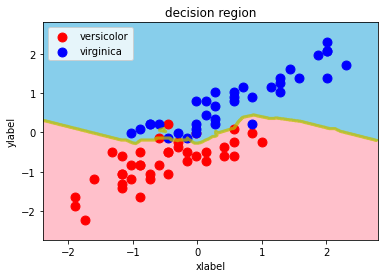

In [19]:
neigh = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)
decision_region(x_train, y_train, neigh)

# [Problem 8] Learning by other methods

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

def learn(train_data, test_data, method, tp=None):
    x_train, y_train = train_data[:, :2], train_data[:, 2] 
    x_test, y_test = test_data[:, :2], test_data[:, 2] 

    method.fit(x_train, y_train)
    y_pred = method.predict(x_test)

    print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
    print("Recall score: {}".format(precision_score(y_test, y_pred, average=tp)))
    print("Recall score: {}".format(recall_score(y_test, y_pred, average=tp)))
    print("F1 score: {}".format(f1_score(y_test, y_pred, average=tp)))
    print("Confusion matrix:\n{}".format(confusion_matrix(y_test, y_pred)))

    return x_train, y_train

Logistic regression

Accuracy score: 0.96
Recall score: [0.91666667 1.        ]
Recall score: [1.         0.92857143]
F1 score: [0.95652174 0.96296296]
Confusion matrix:
[[11  0]
 [ 1 13]]


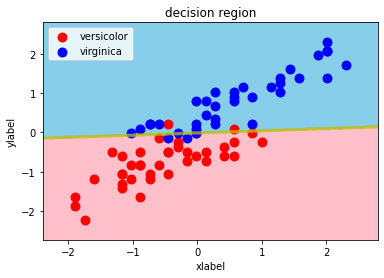

In [21]:
y = np.array([train[:, 2]])
y = y.reshape(y.shape[1], 1)
train_data = np.hstack((x_train, y))

y = np.array([test[:, 2]])
y = y.reshape(y.shape[1], 1)
test_data = np.hstack((x_test, y))

clf = LogisticRegression(random_state=0)
xt, yt = learn(train_data, test_data, clf)
decision_region(xt, yt, clf)

Support vector classifier

Accuracy score: 0.96
Recall score: [0.91666667 1.        ]
Recall score: [1.         0.92857143]
F1 score: [0.95652174 0.96296296]
Confusion matrix:
[[11  0]
 [ 1 13]]


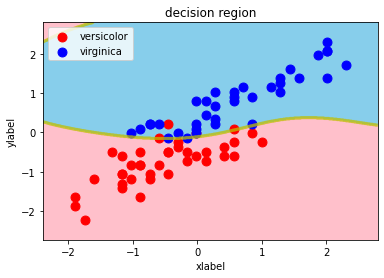

In [22]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
xt, yt = learn(train_data, test_data, clf)
decision_region(xt, yt, clf)

Decision Tree Classifier

Accuracy score: 0.92
Recall score: [0.84615385 1.        ]
Recall score: [1.         0.85714286]
F1 score: [0.91666667 0.92307692]
Confusion matrix:
[[11  0]
 [ 2 12]]


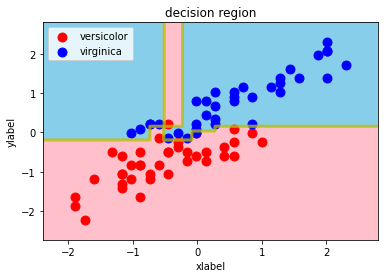

In [23]:
clf = DecisionTreeClassifier(random_state=0)
xt, yt = learn(train_data, test_data, clf)
decision_region(xt, yt, clf)

Random Forest Classifier

Accuracy score: 0.92
Recall score: [0.90909091 0.92857143]
Recall score: [0.90909091 0.92857143]
F1 score: [0.90909091 0.92857143]
Confusion matrix:
[[10  1]
 [ 1 13]]


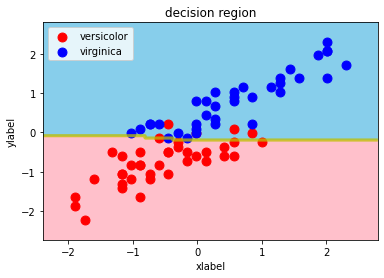

In [24]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
xt, yt = learn(train_data, test_data, clf)
decision_region(xt, yt, clf)

# [Problem 9] (Advanced task) Comparison with and without standardization

Accuracy score: 0.96
Recall score: [0.91666667 1.        ]
Recall score: [1.         0.92857143]
F1 score: [0.95652174 0.96296296]
Confusion matrix:
[[11  0]
 [ 1 13]]


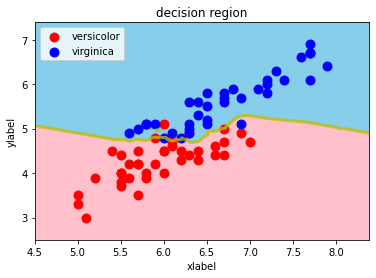

In [25]:
clf = KNeighborsClassifier(n_neighbors=3)
xt, yt = learn(train, test, clf)
decision_region(xt, yt, clf)

Accuracy score: 0.96
Recall score: [0.91666667 1.        ]
Recall score: [1.         0.92857143]
F1 score: [0.95652174 0.96296296]
Confusion matrix:
[[11  0]
 [ 1 13]]


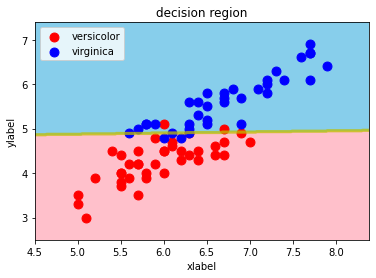

In [26]:
clf = LogisticRegression(random_state=0)
xt, yt = learn(train, test, clf)
decision_region(xt, yt, clf)

Accuracy score: 0.96
Recall score: [0.91666667 1.        ]
Recall score: [1.         0.92857143]
F1 score: [0.95652174 0.96296296]
Confusion matrix:
[[11  0]
 [ 1 13]]


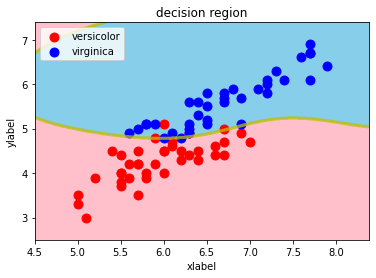

In [27]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
xt, yt = learn(train, test, clf)
decision_region(xt, yt, clf)

Accuracy score: 0.92
Recall score: [0.84615385 1.        ]
Recall score: [1.         0.85714286]
F1 score: [0.91666667 0.92307692]
Confusion matrix:
[[11  0]
 [ 2 12]]


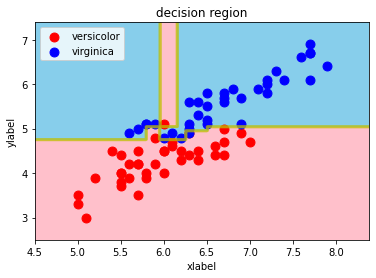

In [28]:
clf = DecisionTreeClassifier(random_state=0)
xt, yt = learn(train, test, clf)
decision_region(xt, yt, clf)

Accuracy score: 0.92
Recall score: [0.90909091 0.92857143]
Recall score: [0.90909091 0.92857143]
F1 score: [0.90909091 0.92857143]
Confusion matrix:
[[10  1]
 [ 1 13]]


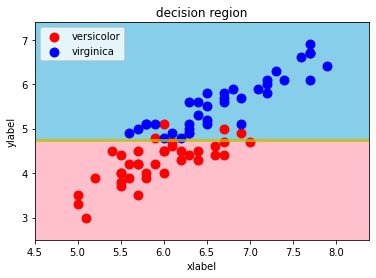

In [29]:
clf = DecisionTreeClassifier(max_depth=2, random_state=0)
xt, yt = learn(train, test, clf)
decision_region(xt, yt, clf)

Standardization is a scaling technique in which values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation, and this scaling technique could be helpful in cases where data follows a Gaussian distribution.<br>
The reason why we would use standardization as a processing step in machine learning is to scale the data to fit and optimize some model, for instance, models that use distance-based algorithms such as KNN, SVM,.. These models use the distances between data points to determine their similarity.

# [Problem 10] (Advance task) Highly accurate method using all objective variables 

In [30]:
def decision_region_multi(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue', 'green']
    contourf_color = ['pink', 'skyblue', 'lightgreen']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [31]:
data = df.loc[:, ['sepal_length', 'petal_length', 'species']]

d_train, d_test = train_test_split(data.to_numpy())
scaler.fit(d_train[:,:-1])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [32]:
scaler.mean_

array([5.88392857, 3.83839286])

In [33]:
dx_train = scaler.transform(d_train[:, :-1])
dy_train = np.array([d_train[:, 2]])
dy_train = dy_train.reshape(dy_train.shape[1], 1)
train_data = np.hstack((dx_train, dy_train))

dx_test = scaler.transform(d_test[:, :-1])
dy_test = np.array([d_test[:, 2]])
dy_test = dy_test.reshape(dy_test.shape[1], 1)
test_data = np.hstack((dx_test, dy_test))

KNeighbor Classifier method

In [34]:
clf = KNeighborsClassifier(n_neighbors=3)
xt, yt = learn(train_data, test_data, clf, 'macro')

Accuracy score: 1.0
Recall score: 1.0
Recall score: 1.0
F1 score: 1.0
Confusion matrix:
[[15  0  0]
 [ 0 13  0]
 [ 0  0 10]]


In [35]:
xt, yt = learn(train_data, test_data, clf, 'micro')

Accuracy score: 1.0
Recall score: 1.0
Recall score: 1.0
F1 score: 1.0
Confusion matrix:
[[15  0  0]
 [ 0 13  0]
 [ 0  0 10]]


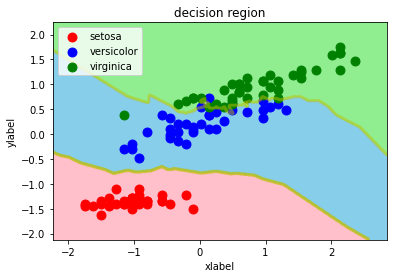

In [36]:
decision_region_multi(xt, yt, clf)

Logistic Regression

In [37]:
clf = LogisticRegression(random_state=0)
xt, yt = learn(train_data, test_data, clf, 'macro')

Accuracy score: 1.0
Recall score: 1.0
Recall score: 1.0
F1 score: 1.0
Confusion matrix:
[[15  0  0]
 [ 0 13  0]
 [ 0  0 10]]


In [38]:
xt, yt = learn(train_data, test_data, clf, 'micro')

Accuracy score: 1.0
Recall score: 1.0
Recall score: 1.0
F1 score: 1.0
Confusion matrix:
[[15  0  0]
 [ 0 13  0]
 [ 0  0 10]]


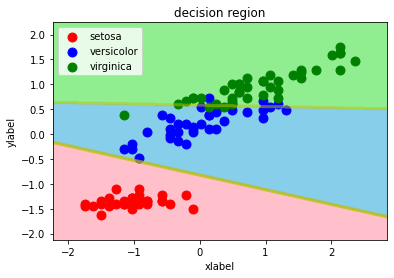

In [39]:
decision_region_multi(xt, yt, clf)

Support vector classifier

In [40]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
xt, yt = learn(train_data, test_data, clf, 'macro')

Accuracy score: 1.0
Recall score: 1.0
Recall score: 1.0
F1 score: 1.0
Confusion matrix:
[[15  0  0]
 [ 0 13  0]
 [ 0  0 10]]


In [41]:
xt, yt = learn(train_data, test_data, clf, 'micro')

Accuracy score: 1.0
Recall score: 1.0
Recall score: 1.0
F1 score: 1.0
Confusion matrix:
[[15  0  0]
 [ 0 13  0]
 [ 0  0 10]]


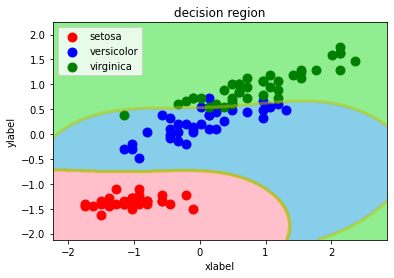

In [42]:
decision_region_multi(xt, yt, clf)

Decision Tree Classifier

In [43]:
clf = DecisionTreeClassifier(random_state=0)
xt, yt = learn(train_data, test_data, clf, 'macro')

Accuracy score: 0.9736842105263158
Recall score: 0.9761904761904763
Recall score: 0.9666666666666667
F1 score: 0.9701104613385315
Confusion matrix:
[[15  0  0]
 [ 0 13  0]
 [ 0  1  9]]


In [44]:
xt, yt = learn(train_data, test_data, clf, 'micro')

Accuracy score: 0.9736842105263158
Recall score: 0.9736842105263158
Recall score: 0.9736842105263158
F1 score: 0.9736842105263158
Confusion matrix:
[[15  0  0]
 [ 0 13  0]
 [ 0  1  9]]


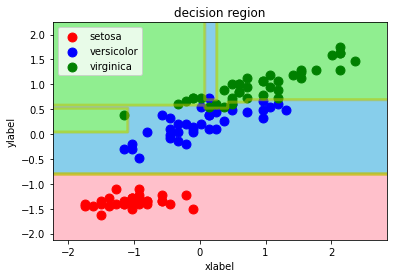

In [45]:
decision_region_multi(xt, yt, clf)

Random Forest

In [46]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
xt, yt = learn(train_data, test_data, clf, 'macro')

Accuracy score: 1.0
Recall score: 1.0
Recall score: 1.0
F1 score: 1.0
Confusion matrix:
[[15  0  0]
 [ 0 13  0]
 [ 0  0 10]]


In [47]:
xt, yt = learn(train_data, test_data, clf, 'micro')

Accuracy score: 1.0
Recall score: 1.0
Recall score: 1.0
F1 score: 1.0
Confusion matrix:
[[15  0  0]
 [ 0 13  0]
 [ 0  0 10]]


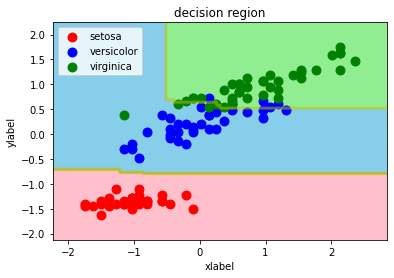

In [48]:
decision_region_multi(xt, yt, clf)